# Find representative subset
We want to understand better the scoring of the results and for that we need to take small portion of the data, but we want it to be as much representative to the whole data.

Therefore, we first scan the global catalog and check in which areas have number of craters which is relative to the subsection area. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import numpy as np
from PIL import Image
albedo = Image.open("../../data/maps/Clementine_albedo_simp750.jpg")

In [2]:
# import catalogs and merge them: 
df1 = pd.read_csv('../../data/catalogues/HeadCraters.csv', names=['Lon','Lat','D'], header=0)
df2 = pd.read_csv('../../data/catalogues/LROCCraters.csv', usecols=[2,3,4], names=['D', 'Lon', 'Lat'], header=0)[['Lon','Lat','D']]
print(df1.info())
print(df2.info())
ca = pd.concat([df1,df2])
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 3 columns):
Lon    5185 non-null float64
Lat    5185 non-null float64
D      5185 non-null float64
dtypes: float64(3)
memory usage: 121.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19335 entries, 0 to 19334
Data columns (total 3 columns):
Lon    19335 non-null float64
Lat    19335 non-null float64
D      19335 non-null float64
dtypes: float64(3)
memory usage: 453.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24520 entries, 0 to 19334
Data columns (total 3 columns):
Lon    24520 non-null float64
Lat    24520 non-null float64
D      24520 non-null float64
dtypes: float64(3)
memory usage: 766.2 KB


In [3]:
lon_win_size=18 #longitude window size in degrees (10% of the data)
lat_win_size=12 #latitude window size in degrees (10% of the data)
overlap=0.5 #overlap between adjacent windows, fraction
up_con = sum((ca.Lat>-60) & (ca.Lat<60))*0.011 #upper condition number of craters
low_con = sum((ca.Lat>-60) & (ca.Lat<60))*0.009 #lower condition
lons = np.arange(-180,180,lon_win_size-round(overlap*lon_win_size))
lats = np.arange(-60,60,lat_win_size-round(overlap*lat_win_size))
Ds = np.empty([len(lats),len(lons)])
can_lons = []
can_lats = []
for ilat,lat in enumerate(lats):
    for ilon,lon in enumerate(lons):
        ind = (ca.Lon>lon) & (ca.Lon<=lon+lon_win_size) & (ca.Lat>lat) & (ca.Lat<=lat+lat_win_size)
        Ds[ilat,ilon] = sum(ind)
        if (sum(ind)<up_con) & (sum(ind)>low_con): #numer of craters close to 1%
            can_lons.append(lon)
            can_lats.append(lat)

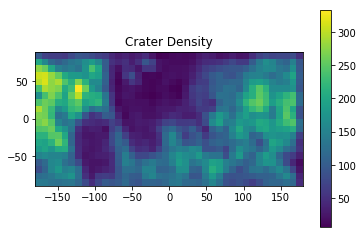

In [4]:
plt.imshow(np.flipud(Ds), extent=[-180,180,-90,90])
plt.colorbar()
plt.title('Crater Density');

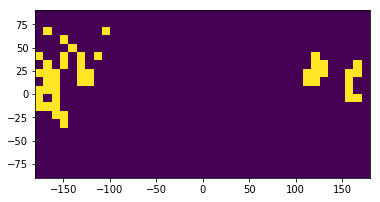

In [8]:
candidates = (Ds/len(ca)<0.011) & (Ds/len(ca)>0.009)
plt.imshow(np.flipud(candidates), extent=[-180,180,-90,90]);

In [9]:
len(can_lats)

49

In [10]:
(N, Bins)=np.histogram(ca.D,bins=100, density=True, range=(5,50))
dists=[]
for i in range(len(can_lats)):
# i=1;
    lon = can_lons[i]; lat = can_lats[i]
    ind = (ca.Lon>lon) & (ca.Lon<=lon+lon_win_size) & (ca.Lat>lat) & (ca.Lat<=lat+lat_win_size)
    (n, bins) = np.histogram(ca.loc[ind,'D'], bins=100, density=True, range=(5,50))
    dists.append(((N-n)**2).sum())
sort_ind = np.argsort(dists)

best match found at Longitudes 108 - 126, Latitudes 12 - 24, with 244 craters.


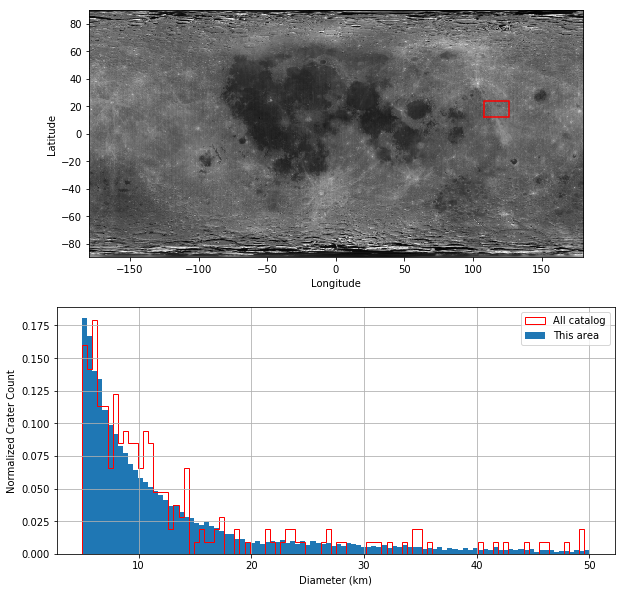

In [31]:
i=sort_ind[2]
lon = can_lons[i]; lat = can_lats[i]
ind = (ca.Lon>lon) & (ca.Lon<=lon+lon_win_size) & (ca.Lat>lat) & (ca.Lat<=lat+lat_win_size)
print('best match found at Longitudes {} - {}, Latitudes {} - {}, with {} craters.'.format(lon,lon+lon_win_size,lat,lat+lat_win_size,sum(ind)))

plt.figure(figsize=[10, 10])
plt.subplot(2,1,1)
dem_map = plt.imshow(albedo, extent=[-180,180,-90,90], aspect="equal", cmap="gray")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.plot([lon, lon, lon+lon_win_size, lon+lon_win_size, lon], [lat, lat+lat_win_size, lat+lat_win_size, lat, lat],'r');
plt.subplot(2,1,2)
ca.D.hist(bins=100, density=True, range=(5,50))
ca.loc[ind,'D'].hist(bins=100, density=True, histtype='step', range=(5,50), color='red');
plt.legend(['All catalog','This area'])
plt.xlabel('Diameter (km)')
plt.ylabel('Normalized Crater Count');

In [20]:
lon=-63; lat=-18

ind = (ca.Lon>lon) & (ca.Lon<=lon+lon_win_size) & (ca.Lat>lat) & (ca.Lat<=lat+lat_win_size)
sum(ind)

68

In [21]:
sum((ca.Lat>-60) & (ca.Lat<60))

23636

In [25]:
(n,bins)=np.histogram(ca.Lat, bins=180)

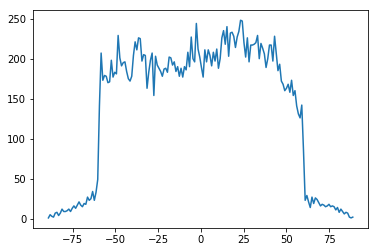

In [29]:
b=[]
for i in range(len(bins)-1):
    b.append((bins[i+1]+bins[i])/2)
plt.plot(b,n)
# plt.plot(b,n/np.cos(np.radians(b)))

# Scraping LROC DEM Locations

In [ ]:
import urllib

link = "http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM/"
f = urllib.request.urlopen(link)
# webtext = str(f.read())
# type(webtext)
# lines = webtext[webtext.find('Parent Directory'):]
lines = f.readlines()
for line in lines:
    print(line)
# myfile = f.readline()
# print(lines[1])

In [ ]:
import os
import time
# Download file:
data_path = '../../data/'
fn_pre='HANSTEENAL3'

# fn_pre='NAC_DTM_POSIDONIUS'
website = 'http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM/'
# website='http://lroc.sese.asu.edu/data/LRO-L-LROC-5-RDR-V1.0/LROLRC_2001/DATA/SDP/NAC_DTM/AESTUUM2/'
# for fn in [fn_pre+'.TIF', fn_pre+'.LBL']:
fn = 'NAC_DTM_'+fn_pre+'.LBL'
if os.path.isfile(data_path+fn): 
    print('File {} exist in library!'.format(fn))
else: 
    s_time = time.time()
    print('File {} does not exist in library. downloading now ...'.format(fn))
    URL = website+fn_pre+'/'+fn
#         os.sys('wget -P "$data_path" "$URL"')
    !wget -P "$data_path" "$URL"
    print('Downloaded into {}'.format(data_path+fn))
    print("Time elapsed: {0:.1f} sec".format(time.time() - s_time))
        
# Read source image.
# img = Image.open(data_path + fn_pre + '.TIF')
# print('Original image. size (shape): {} | mode (bit depth): {}'.format(img.size, img.mode))
# dimensions of source image: [Min long, max long, min lat, max lat] 
# read from Label file: 
import re
file = open(data_path + fn,'r')
lines = [line.rstrip('\n') for line in file]
for line in lines:
    if 'MAXIMUM_LATITUDE' in line:
        max_lat=float(re.findall("\d+.\d*",line)[0])
    if 'MINIMUM_LATITUDE' in line:
        min_lat=float(re.findall("\d+.\d*",line)[0])
    if 'EASTERNMOST_LONGITUDE' in line:
        max_lon=float(re.findall("\d+.\d*",line)[0])
    if 'WESTERNMOST_LONGITUDE' in line:
        min_lon=float(re.findall("\d+.\d*",line)[0])
    if 'MAP_SCALE' in line:
        res=float(re.findall("\d+.\d*",line)[0])

source_cdim = [min_lon, max_lon, min_lat, max_lat]
print(source_cdim)
print('map resolution: {} m/pix'.format(res))

In [ ]:
plt.figure(figsize=[10, 10])
plt.subplot(2,1,1)
dem_map = plt.imshow(albedo, extent=[-180,180,-90,90], aspect="equal", cmap="gray")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.plot([lon, lon, lon+lon_win_size, lon+lon_win_size, lon], [lat, lat+lat_win_size, lat+lat_win_size, lat, lat],'r');
